<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#前馈神经网络结构及前向传播" data-toc-modified-id="前馈神经网络结构及前向传播-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>前馈神经网络结构及前向传播</a></span></li><li><span><a href="#参数学习" data-toc-modified-id="参数学习-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>参数学习</a></span></li><li><span><a href="#误差反向传播" data-toc-modified-id="误差反向传播-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>误差反向传播</a></span></li><li><span><a href="#梯度下降算法" data-toc-modified-id="梯度下降算法-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>梯度下降算法</a></span></li><li><span><a href="#前馈网络的实现" data-toc-modified-id="前馈网络的实现-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>前馈网络的实现</a></span></li></ul></div>

# 前馈神经网络（Feedforward Neural Network，FNN）

## 前馈神经网络结构及前向传播

训练数据集
\begin{align*} \\& T = \left\{ \left( \mathbf{x}_{1}, y_{1} \right), \left( \mathbf{x}_{2}, y_{2} \right), \cdots, \left(\mathbf{x}_i,y_i\right),\cdots,\left( \mathbf{x}_{N}, y_{N} \right) \right\} \end{align*}   
其中，$\mathbf{x}_{i}$为第$i$个特征向量（实例），$\mathbf{x}_{i}=\left( x^{\left(1\right)}_i,x^{\left(2\right)}_i,\ldots ,x^{\left(j\right)}_i,\ldots ,x^{\left(n\right)}_i\right) ^{T} \in \mathcal{X} \subseteq \mathbb{R}^{n}$；$y_{i}$为$\mathbf{x}_{i}$的类别标记，类别标记表示为类别位置为1，其余位置为0的类别向量（one-hot编码）,$\mathbf{y}_i\in\{0,1\}^m$。

前馈神经网络输入层（层 1）  \begin{align*} & \mathbf{a}^{1}=\left( a_{1}^{1},a_{2}^{1},\ldots ,a_{j}^{1},\ldots ,a_{n}^{1}\right) ^{T}\\ & a_{j}^{1}=x^{\left(j\right)}_i\quad\left( j=1,2,\ldots ,n\right) \end{align*}

前馈神经网络隐藏层（层 2） \begin{align*} & \mathbf{a}^{2}=\left( a_{1}^{2},a_{2}^{2},\ldots ,a_{j}^{2},\ldots  ,a_{p}^{2}\right) ^{T}\\ & a_{j}^{2}=\sigma \left( z_{j}^{2}\right) \\ & z_{j}^{2}= \sum _{k}w_{jk}^{2}\cdot a_{k}^{1}+b_{j}^{2}\quad\left( j=1,2,\ldots ,p\right) \\& \mathbf{z}^{2}=\left( z_{1}^{2},z_{2}^{2},\ldots ,z_{j}^{2},\ldots ,z_{p}^{2}\right) ^{T}\end{align*}

前馈神经网络输出层（层 3） \begin{align*} & \mathbf{a}^{3}=\left( a_{1}^{3},a_{2}^{3},\ldots ,a_{j}^{3},\ldots,a_{m}^{3}\right) ^{T}\\ & a_{j}^{3}=\sigma \left( z_{j}^{3}\right) \\ & z_{j}^{3}= \sum _{k}w_{jk}^{3}\cdot a_{k}^{2}+b_{j}^{3}\quad\left( j=1,2,\ldots ,m\right) \\& \mathbf{z}^{3}=\left( z_{1}^{3},z_{2}^{3},\ldots ,z_{j}^{3},\ldots ,z_{m}^{3}\right) ^{T}\end{align*}

预测输出 \begin{align*} & \hat{\mathbf{y}}=\left( \hat y_{1},\hat y_{2},\ldots ,\hat y_{j},\ldots ,\hat y_{m}\right) ^{T}\\ & \hat y_{j}=a_{j}^{3}\quad\left( j=1,2,\ldots ,m\right)\end{align*}  

实际输出 \begin{align*} & \mathbf{y}=\left( y_{1},y_{2},\ldots ,y_{j},\ldots ,y_{m}\right) ^{T}  \quad\left( j=1,2,\ldots ,m\right) \end{align*} 

其中，$\sigma\left(\cdot\right)$为激活函数。

## 参数学习

单个实例$\mathbf{x}$的损失函数$L_{\mathbf{x}}\left(\mathbf{y},\hat{\mathbf{y}}\right)$为平方损失函数、
$$\begin{align*} & C_{\mathbf{x}}=\dfrac {1} {2}\left\| \mathbf{y}-\hat {\mathbf{y}}\right\| ^{2}=\dfrac {1} {2}\sum _{j}\left( y_{j}-\hat {y}_{j}\right) ^{2} \end{align*} $$

目标函数（经验风险）  \begin{align*} & C=\dfrac {1} {N}\sum _{\mathbf{x}}C_{\mathbf{x}} \end{align*} 

第$l$层参数$w_{jk}^l$更新为  
$$\begin{align}
w_{jk}^l & \leftarrow w_{jk}^l-\alpha \dfrac {\partial C} {\partial w_{jk}^{l}}  \\
&=w_{jk}^l-\alpha\frac{1}{N}\sum_{\mathbf{x}}\dfrac {\partial C_x} {\partial w_{jk}^{l}}
\end{align}$$

第$l$层参数$b_j^l$更新为    
$$\begin{align}
b_j^l & \leftarrow b_j^l-\alpha \dfrac {\partial C} {\partial b_j^{l}}  \\
&=b_j^l-\alpha\frac{1}{N}\sum_{\mathbf{x}}\dfrac {\partial C_x} {\partial b_j^{l}}
\end{align}$$

## 误差反向传播

定义第$l$层的第$j$个神经元上的误差 \begin{align*} & \delta _{j}^{l}\equiv \dfrac {\partial C_{\mathbf{x}}} {\partial z_{j}^{l}} \quad\left( l=2,3\right)\end{align*} 

输出层误差 
$$\begin{align} \delta _{j}^{3}&=\dfrac {\partial C_{\mathbf{x}}} {\partial z_{j}^{3}} \\ 
& =\dfrac {\partial C_{\mathbf{x}}} {\partial a_{j}^{3}}\cdot\dfrac {\partial a_{j}^{3}} {\partial z_{j}^{3}} \\ & =\dfrac {\partial \left(\sum_{j=1}^m \left(y_j-\hat{y}_j\right)^2\right)} {\partial \hat{y}_j}\cdot \sigma '\left( z_{j}^{3}\right) \\
& = \left(\hat{y}_j-y_j\right) \cdot \sigma'\left( z_{j}^{3} \right)\quad\left( j=1,2,\ldots ,m\right)\end{align}$$  

隐藏层误差
$$\begin{align} \delta _{j}^{2}&=\dfrac {\partial C_{\mathbf{x}}} {\partial z_{j}^{2}}\\ 
& =\sum _{k}\dfrac {\partial C_{\mathbf{x}}} {\partial z_{k}^{3}}\cdot \dfrac {\partial z_{k}^{3}} {\partial z_{j}^{2}} \\ 
& = \sum _{k} \dfrac {\partial z_{k}^{3}} {\partial z_{j}^{2}}\cdot\delta _{k}^{3}\\ 
& = \sum _{k} \dfrac {\partial \left( \sum _{j}w_{kj}^{3}\cdot a_{j}^{2}+b_{k}^{3}\right)} {\partial z_{j}^{2}}\cdot\delta _{k}^{3}\\ 
& = \sum _{k} \dfrac {\partial \left( \sum _{j}w_{kj}^{3}\cdot  \sigma \left( z_{j}^{2}\right)+b_{k}^{3}\right)} {\partial z_{j}^{2}}\cdot\delta _{k}^{3}\\ 
& = \sum _{k} w_{kj}^{3}\cdot \sigma '\left( z_{j}^{2}\right) \cdot\delta _{k}^{3} \\ 
& = \sigma '\left( z_{j}^{2}\right) \cdot\sum _{k} w_{kj}^{3} \delta _{k}^{3} \quad\left( j=1,2,\ldots ,p\right)\quad\left( k=1,2,\ldots ,m\right)
\end{align} $$

## 梯度下降算法

损失函数在隐藏层（层2）／输出层（层3）关于偏置的梯度 \begin{align*} & \dfrac {\partial C_{\mathbf{x}}} {\partial b_{j}^{l}}=\dfrac {\partial C_{\mathbf{x}}} {\partial z_{j}^{l}}\cdot \dfrac {\partial z_{j}^{l}} {\partial b_{j}^{l}}=\delta _{j}^{l}\cdot \dfrac {\partial \left( \sum _{k}w_{jk}^{l}a_{k}^{l-1}+b_{j}^{l}\right) } {\partial b_{j}^{l}}=\delta _{j}^{l}\quad\left( l=2,3\right)\end{align*} 

损失函数在隐藏层（层2）／输出层（层3）关于权值的梯度\begin{align*} & \dfrac {\partial C_{\mathbf{x}}} {\partial w_{jk}^{l}}=\dfrac {\partial C_{\mathbf{x}}} {\partial z_{j}^{l}}\cdot \dfrac {\partial z_{j}^{l}} {\partial w_{jk}^{l}}=\delta _{j}^{l}\cdot \dfrac {\partial \left( \sum _{k}w_{jk}^{l}a_{k}^{l-1}+b_{j}^{l}\right) } {\partial w_{jk}^{l}}=\delta _{j}^{l}\cdot a_{k}^{l-1}\quad\left( l=2,3\right)\end{align*} 

算法4.1 偏置与权值的梯度计算算法  
输入：实例$\mathbf{x}=\left(x^{\left(1\right)},\cdots,x^{\left(n\right)}\right)^\top$    
输出：损失函数在隐藏层（层2）／输出层（层3）关于偏置及权值的梯度$\left(\dfrac {\partial C_{\mathbf{x}}} {\partial b_{j}^{l}}\right)$和$\left(\dfrac {\partial C_{\mathbf{x}}} {\partial w_{jk}^{l}}\right)$   
1. 为输入层设置对应的激活值$\left(a_j^1\right)_{j=1}^n=\left(x^{\left(j\right)}\right)_{j=1}^n$ 
2.  前向传播：对每个$l（l=2,3）$计算\begin{align*} &a_{j}^{l}=\sigma \left( z_{j}^{l}\right) \\ & z_{j}^{l}= \sum _{k}w_{jk}^{l}\cdot a_{k}^{l-1}+b_{j}^{l}\end{align*}  
3. 计算输出层误差$\left(\delta _{j}^{3}\right)_{j=1}^m$；  
4. 计算误差反向传播：隐藏层误差$\left(\delta _{j}^{2}\right)_{j=1}^p$；  
5. 计算损失函数在隐藏层（层2）／输出层（层3）关于偏置及权值的梯度$\left(\dfrac {\partial C_{\mathbf{x}}} {\partial b_{j}^{l}}\right)$和$\left(\dfrac {\partial C_{\mathbf{x}}} {\partial w_{jk}^{l}}\right)$。

算法4.2 梯度下降算法：  
输入：训练实例集合$T$  
输出：偏置和权值的更新
1. 对每个训练实例$\mathbf{x}$：设置对应的输入激活$\mathbf{a}^{\mathbf{x},1}$，并执行以下步骤：
    + 前向传播：计算$\mathbf{z}^{\mathbf{x},l}=\mathbf{W}^l\mathbf{a}^{\mathbf{x},l-1}+\mathbf{b}^l$及$\mathbf{a}^{\mathbf{x},l}=\sigma\left(\mathbf{z}^{\mathbf{x},l}\right)$，其中$l=2,3,\cdots,L$。
    + 输出层误差：$\delta^{\mathbf{x},L}=\nabla_{\mathbf{a}^L}C_\mathbf{x}\odot\sigma'\left(\mathbf{z}^{\mathbf{x},L}\right)$
    + 误差反向传播：对每个$l=L-1,L-2,\cdots,2$，计算$\delta^{\mathbf{x},l}=\left(\left(\mathbf{W}^{l+1}\right)^\top\delta^{\mathbf{x},l+1}\right)\odot\sigma'\left(\mathbf{z}^{\mathbf{x},l}\right)$。
2. 梯度下降：对每个$l=L-1,L-2,\cdots,2$，根据$\mathbf{W}^l\leftarrow\mathbf{W}^l-\frac{\eta}{m}\sum_\mathbf{x}\delta^{\mathbf{x},l}\left(\mathbf{a}^{\mathbf{x},l-1}\right)^\top$和$\mathbf{b}^l\leftarrow\mathbf{b}^l-\frac{\eta}{m}\sum_\mathbf{x}\delta^{\mathbf{x},l}$更新权重和偏置。

## 前馈网络的实现

导入相关Python包：

In [1]:
import gzip
import pickle
import random

import numpy as np

from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline

加载MNIST数据集：

(50000, 784) (50000,)
(10000, 784) (10000,)


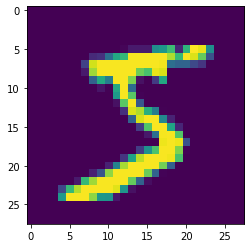

5


In [2]:
def load_data():
    f = gzip.open('./data/mnist.pkl.gz')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return training_data, validation_data, test_data

training_data, validation_data, test_data = load_data()
print(training_data[0].shape, training_data[1].shape)
print(test_data[0].shape, test_data[1].shape)

image = training_data[0][0].reshape(28, 28)
plt.imshow(image)
plt.show()

print(training_data[1][0])

构建支持向量机SVM模型，作为人工神经网络模型的性能对比的基模型：

In [17]:
def svm_baseline():
    training_data, validation_data, test_data = load_data()
    
    clf = svm.SVC()
    clf.fit(training_data[0], training_data[1])
    
    predictions = [int(a) for a in clf.predict(test_data[0])]
    num_correct = sum(int(a == y) for a, y in zip(predictions, test_data[1]))
    print("Baseline classifier using an SVM.")
    print(str(num_correct) + " of " + str(len(test_data[1])) + " values correct.")

In [18]:
svm_baseline()

/anaconda3/envs/dev/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Baseline classifier using an SVM.
9435 of 10000 values correct.


封装训练数据集、验证数据集和测试数据集：

In [55]:
def load_data_wrapper():
    tr_d, va_d, te_d = load_data()
    
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(training_inputs, va_d[1])
    
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    
    return training_data, validation_data, test_data

def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [56]:
 training_data, validation_data, test_data = load_data_wrapper()

定义前馈神经网络模型：

In [57]:
class Network(object):
    
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        training_data = list(training_data)
        n = len(training_data)
        
        if test_data:
            test_data = list(test_data)
            n_test = len(test_data)
            
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k: k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
                
            if test_data:
                print("Epoch {} : {} / {}".format(j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {} complete".format(j))
                
    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        self.biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)]
        self.weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_w)]
    
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        activation = x
        activations = [x]
        zs = []
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
            
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
            
        return nabla_b, nabla_w
    
    def cost_derivative(self, output_activations, y):
        return output_activations - y
        
    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)
    
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

构建输入层784个结点，隐藏层30个结点，输出层10个结点的三层前馈神经网络，使用训练数据集进行模型训练，使用测试数据集进行测试：

In [58]:
net = Network([784,30,10])
net.SGD(training_data, 30, 10, 3.0, test_data)

Epoch 0 : 9093 / 10000
Epoch 1 : 9254 / 10000
Epoch 2 : 9324 / 10000
Epoch 3 : 9354 / 10000
Epoch 4 : 9421 / 10000
Epoch 5 : 9383 / 10000
Epoch 6 : 9431 / 10000
Epoch 7 : 9422 / 10000
Epoch 8 : 9436 / 10000
Epoch 9 : 9460 / 10000
Epoch 10 : 9457 / 10000
Epoch 11 : 9462 / 10000
Epoch 12 : 9479 / 10000
Epoch 13 : 9467 / 10000
Epoch 14 : 9432 / 10000
Epoch 15 : 9453 / 10000
Epoch 16 : 9469 / 10000
Epoch 17 : 9479 / 10000
Epoch 18 : 9493 / 10000
Epoch 19 : 9484 / 10000
Epoch 20 : 9510 / 10000
Epoch 21 : 9498 / 10000
Epoch 22 : 9492 / 10000
Epoch 23 : 9480 / 10000
Epoch 24 : 9482 / 10000
Epoch 25 : 9463 / 10000
Epoch 26 : 9485 / 10000
Epoch 27 : 9499 / 10000
Epoch 28 : 9519 / 10000
Epoch 29 : 9506 / 10000
